In [18]:
#import the python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
#read the dataset
dataframe = pd.read_csv('/Users/rekhasreeks/Documents/DataScience/intogithub/multiple linear regression/insurance-2.csv')

In [20]:

dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
dataframe.shape

(1338, 7)

In [22]:
#finding if any ull values present in the dataset
dataframe.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
dataframe.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [61]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [24]:
import sklearn

In [25]:
dataframe['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [26]:
dataframe['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [27]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
dataframe['sex']= label_encoder.fit_transform(dataframe['sex'])
print(dataframe.head())

   age  sex     bmi  children smoker     region      charges
0   19    0  27.900         0    yes  southwest  16884.92400
1   18    1  33.770         1     no  southeast   1725.55230
2   28    1  33.000         3     no  southeast   4449.46200
3   33    1  22.705         0     no  northwest  21984.47061
4   32    1  28.880         0     no  northwest   3866.85520


In [28]:
dataframe['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [29]:
dataframe['region']=label_encoder.fit_transform(dataframe['region'])
print(dataframe.head())

   age  sex     bmi  children smoker  region      charges
0   19    0  27.900         0    yes       3  16884.92400
1   18    1  33.770         1     no       2   1725.55230
2   28    1  33.000         3     no       2   4449.46200
3   33    1  22.705         0     no       1  21984.47061
4   32    1  28.880         0     no       1   3866.85520


In [30]:
dataframe['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [32]:
dataframe['smoker']=label_encoder.fit_transform(dataframe['smoker'])
print(dataframe.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [45]:
dataframe.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [63]:
dataframe.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

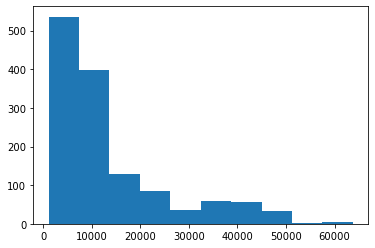

In [81]:
target_column = 'charges'
plt.hist(data=dataframe, x=target_column)


from the above histogram, it is found that most people pay around 2000-12000. Only few people pay more tha 50,000.30,000 Range has small amount of data

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

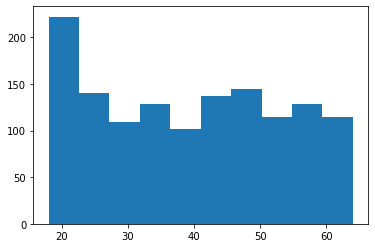

In [82]:
plt.hist(data=dataframe, x='age')

In [125]:
#checking the correlation between different variables
corr = dataframe.corr()
corr


,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [98]:
#Divide the datasets into independent variables
X = dataframe.iloc[:, :-1]
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [99]:
#Divide the datasets into dependend  variables
y = dataframe.iloc[: , 6]
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [100]:
#import train_test_split
from sklearn.model_selection import train_test_split

In [101]:
#spliting the datasets into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [102]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [103]:
prediction = model.predict(X_test)
prediction

array([ 4312.08656955, 12859.49737555, 12370.50358911, 13549.5511475 ,
         410.55490166, 32052.76977091, 13170.26923221, 12248.5052133 ,
        3713.54941225, 29760.32281711, 11338.50159148, 17269.6492891 ,
        8961.13430709,  8184.25429812,  3376.85292436, 10278.37012511,
        3883.36513262,  6793.01504696, 15270.57009799, 14255.67564306,
       12438.83818074, 33176.73034139,  9068.32669468,  8835.62475682,
        2922.83938461,  8155.7017465 ,  9497.57563203, 11015.04509043,
        7503.17666222,  4307.99883589, 13939.03683704,  5657.88640469,
       34592.37757194, 26941.6112407 , 33661.91509295,  9552.53576302,
       30183.50964412, 26485.52800009, 15397.47566838, 33857.57796843,
        6575.23382913, 14015.49951905, 11034.83628114, 14878.37537422,
        4056.87355672, 13036.25142266,  4582.39598034, 28857.50476848,
        7305.25026916, 14215.34197814, 13570.38542044, 12171.25378059,
        1860.5537778 ,  8743.00482524, 25989.68277284, 10318.04975471,
      

In [104]:
from sklearn.metrics import r2_score
score=r2_score(y_test,prediction)
score

0.7623224022563388